$$H/W$$

### **Start**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hw.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### **Kerakli ustunlarni qoldiramiz va qisqa ma'lumotlarini ko'rib chiqamiz**

In [3]:
for i in df.columns:
    if df[i].dtype == object:
        df = df.drop(i, axis=1)

df

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### **Har safar bir hil code yozmaslik uchun function yaratamiz**

#### Style berib ketyabmiz

In [5]:
sns.set_theme(color_codes=True)
sns.set_style('ticks')

#### Function

In [6]:
def chiqar(df, title=''):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    sns.histplot(df['math score'], kde=True, ax=ax[0])
    sns.histplot(df['reading score'], kde=True, ax=ax[1])
    sns.histplot(df['writing score'], kde=True, ax=ax[2])

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.show()

#### Oxirida hammasini chiqarish uchun list yaratamiz 

In [7]:
mix = []

#### Tekshiramiz

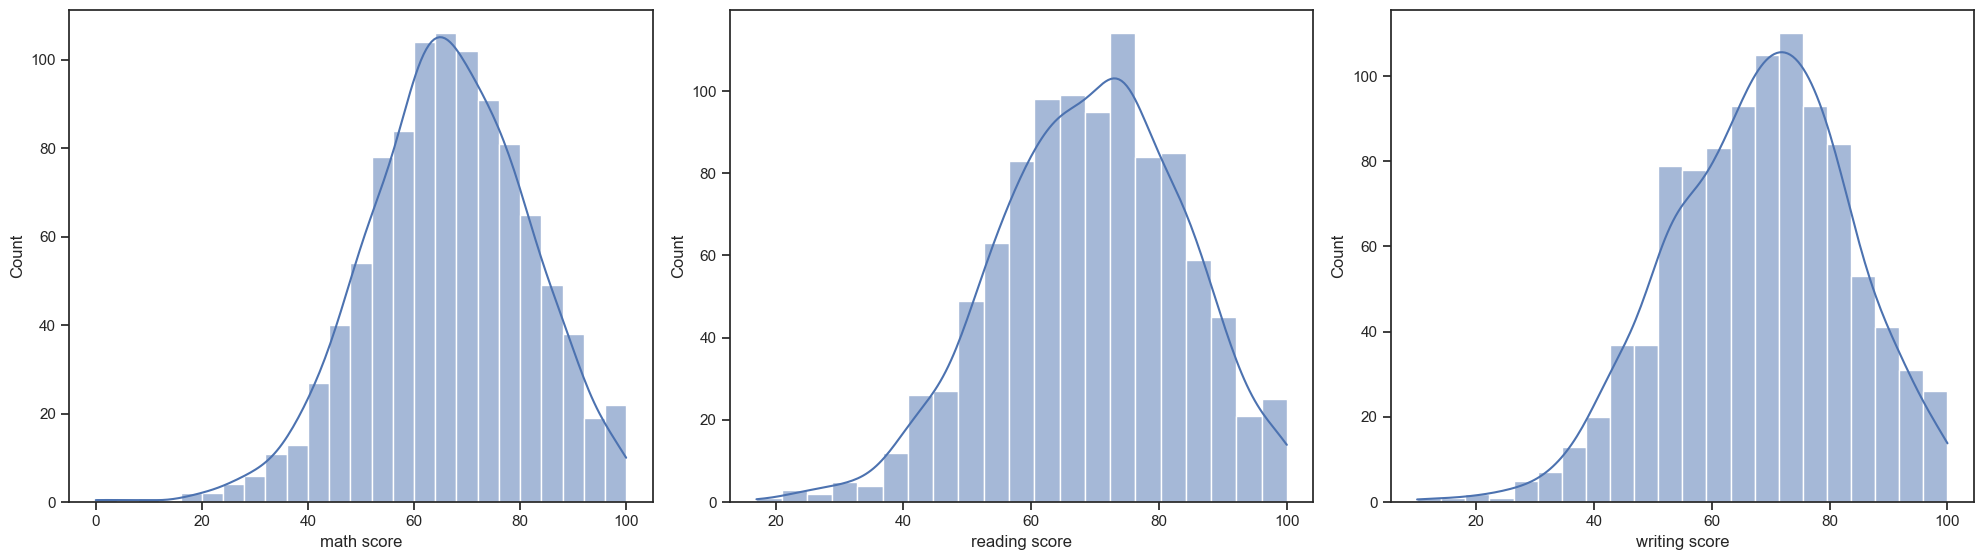

In [8]:
chiqar(df)

### **Standardisation**

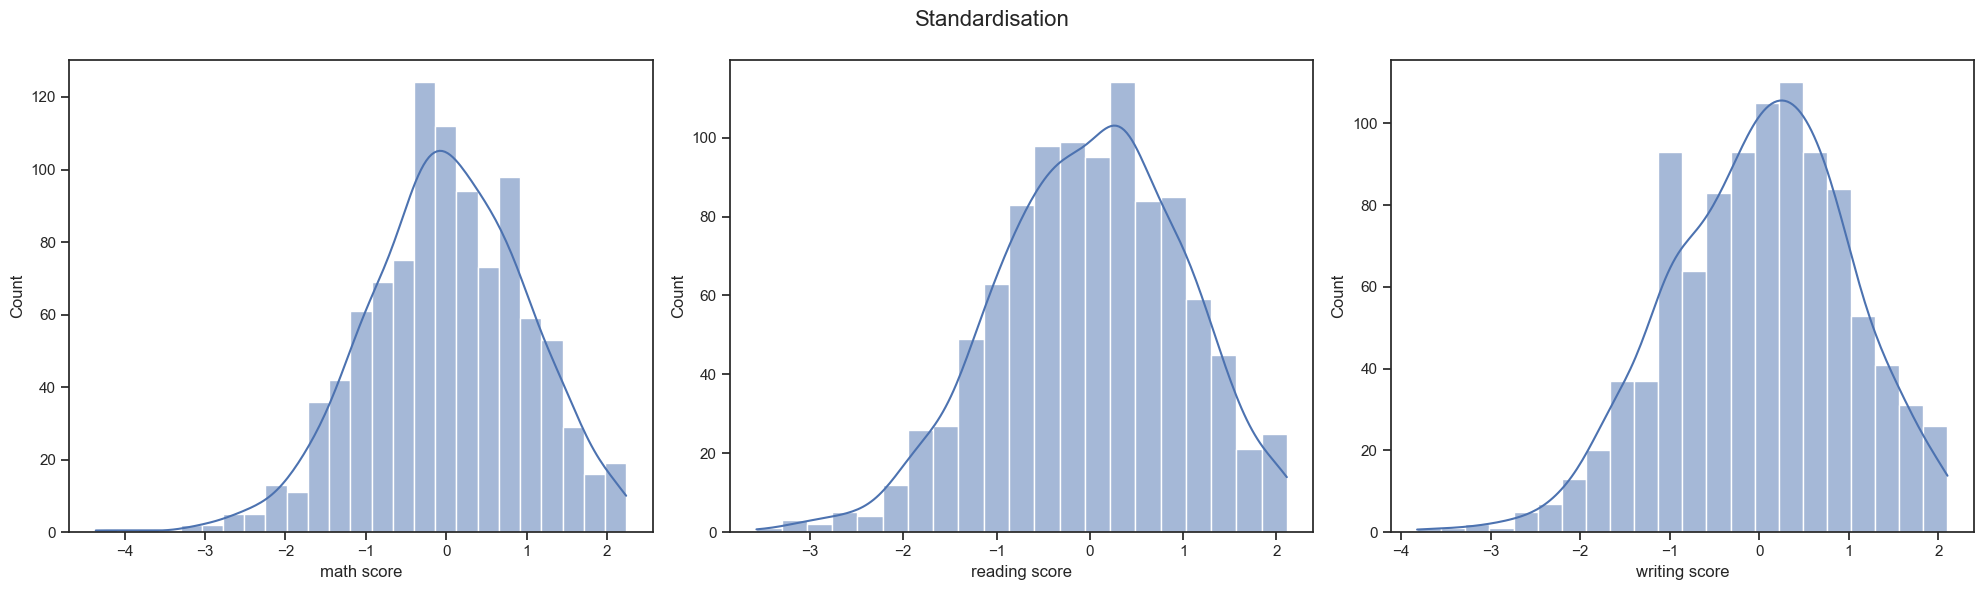

In [9]:
mix.append(((df - df.mean()) / df.std(), 'Standardisation'))
chiqar(mix[-1][0], mix[-1][1])

### **MinMaxScaling**

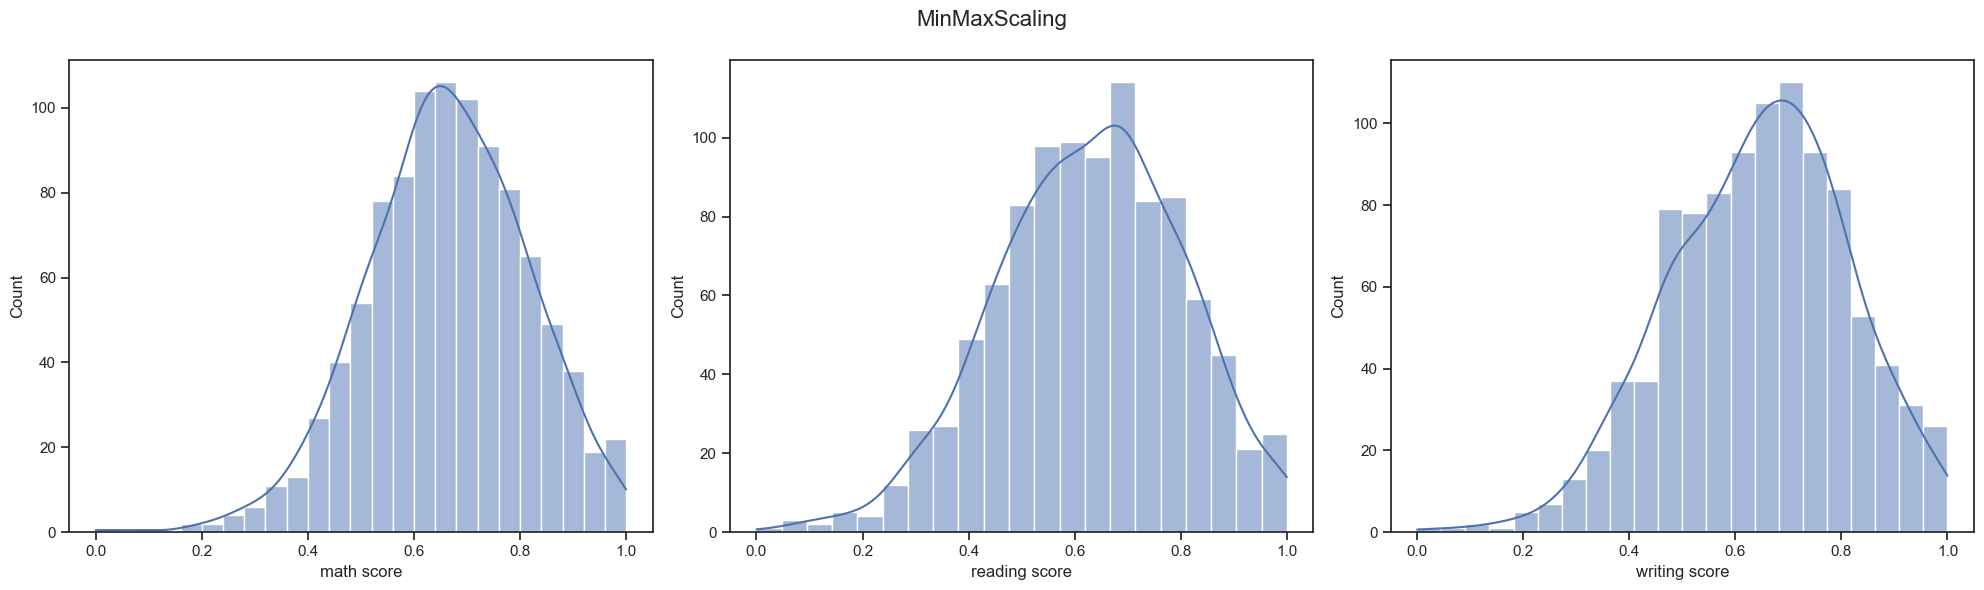

In [10]:
mix.append(((df - df.min()) / (df.max() - df.min()), 'MinMaxScaling'))
chiqar(mix[-1][0], mix[-1][1])

### **Mean normalisation**

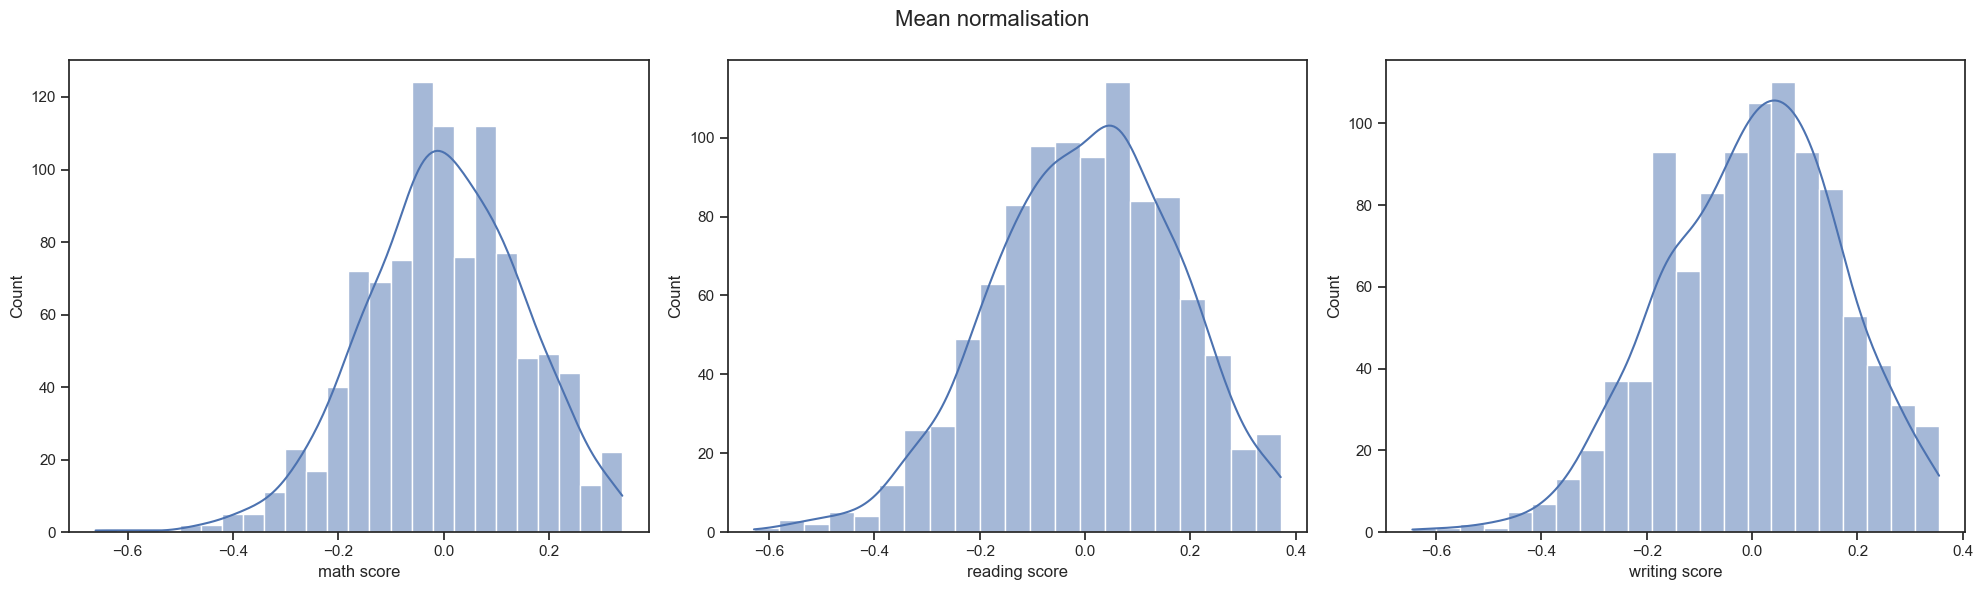

In [11]:
mix.append(((df - df.mean()) / (df.max() - df.min()), 'Mean normalisation'))
chiqar(mix[-1][0], mix[-1][1])

### **MaxAbsScaling**

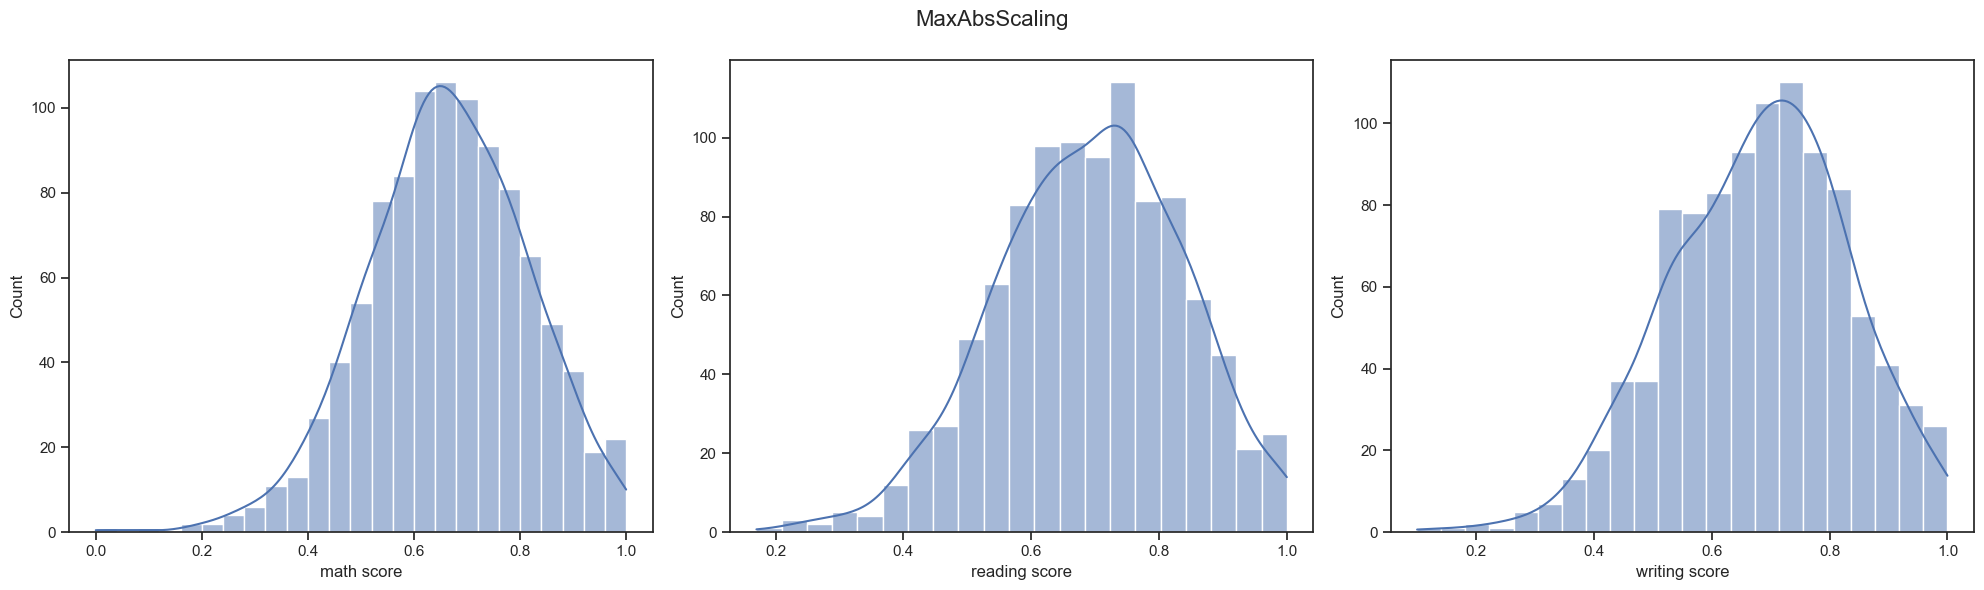

In [12]:
mix.append((df / abs(df.max()), 'MaxAbsScaling'))
chiqar(mix[-1][0], mix[-1][1])

### **Robust Scaling**

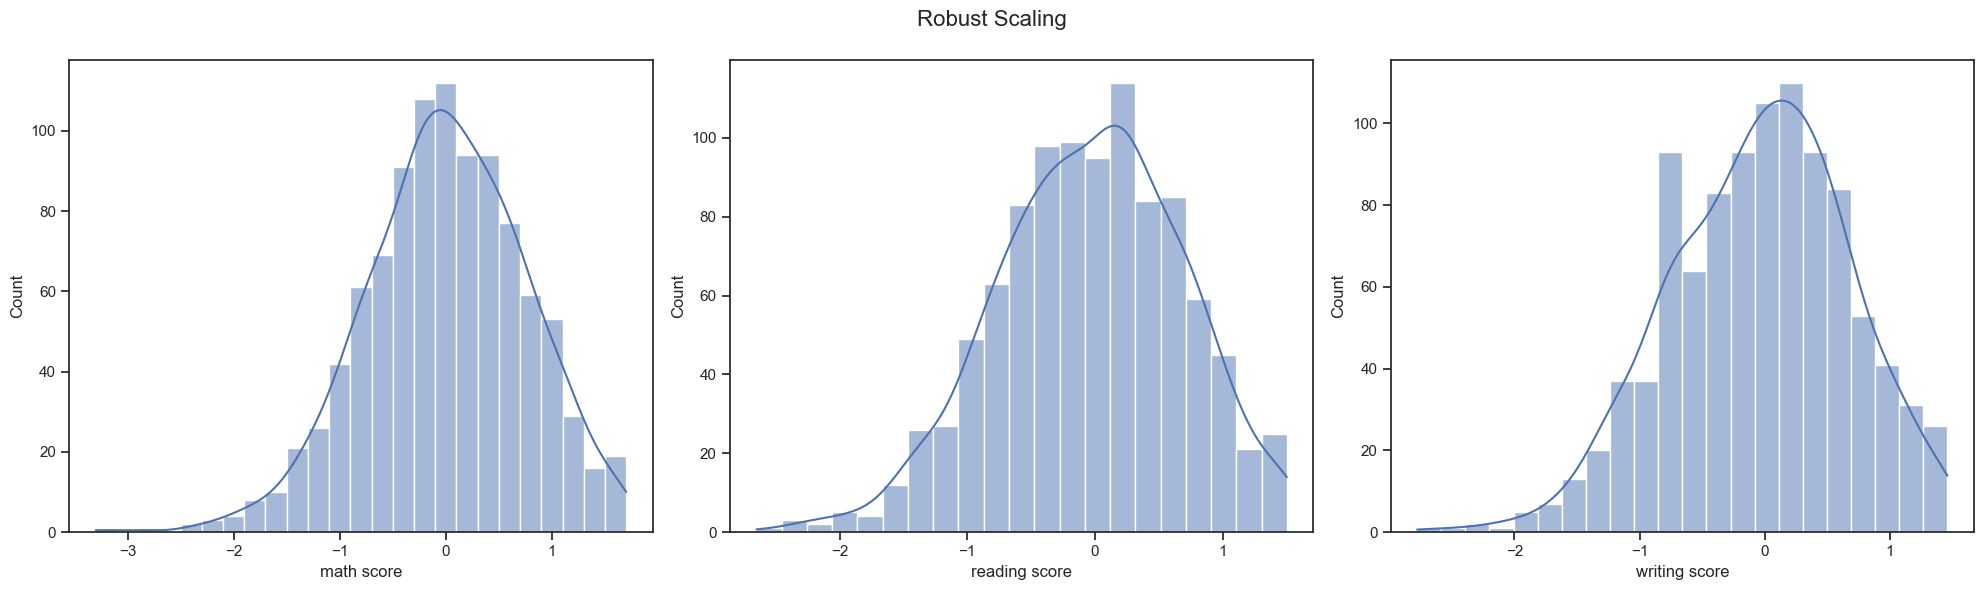

In [13]:
mix.append(((df - df.median()) / (df.quantile(0.75) - df.quantile(0.25)), 'Robust Scaling'))
chiqar(mix[-1][0], mix[-1][1])

### **All**

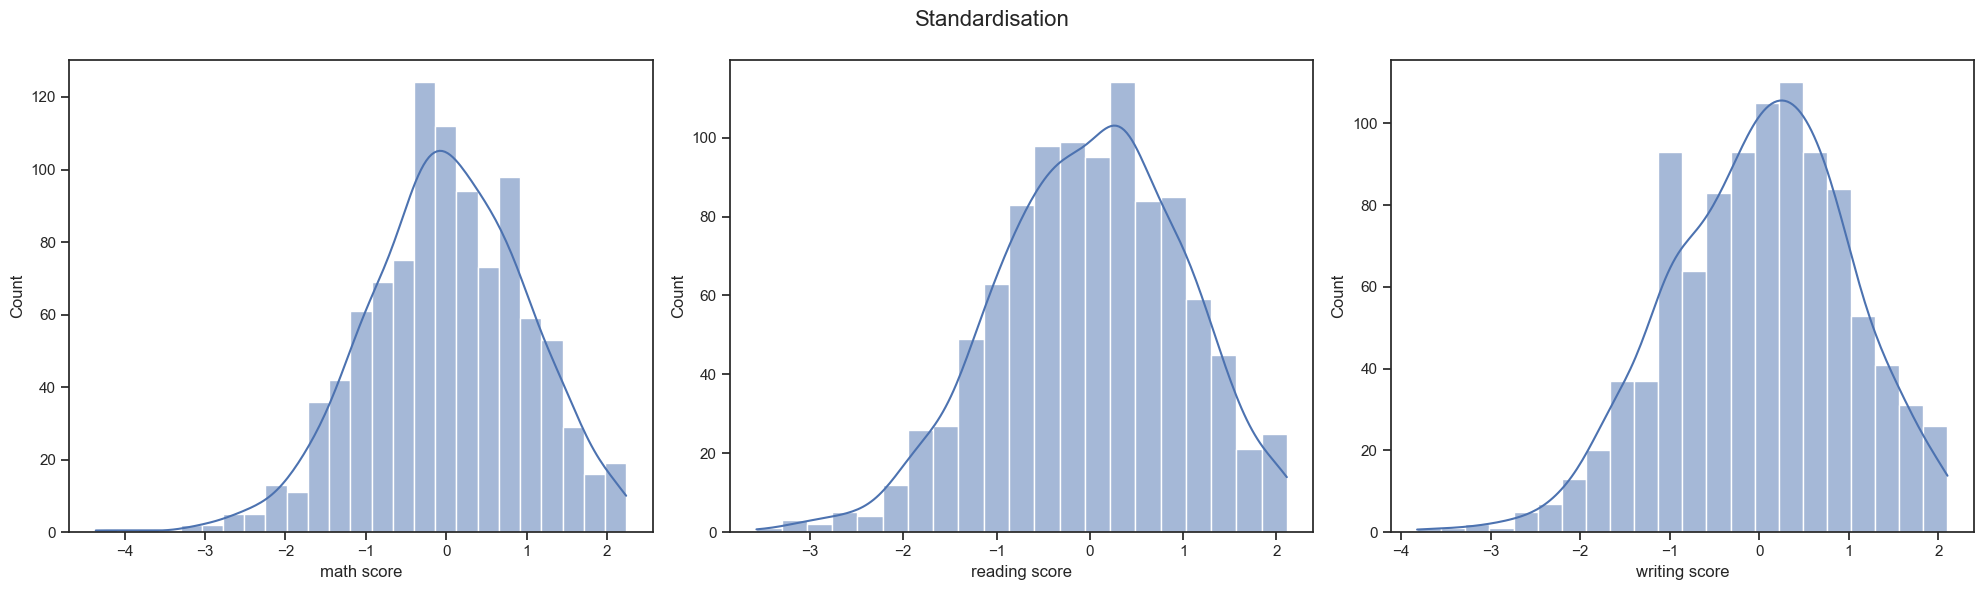

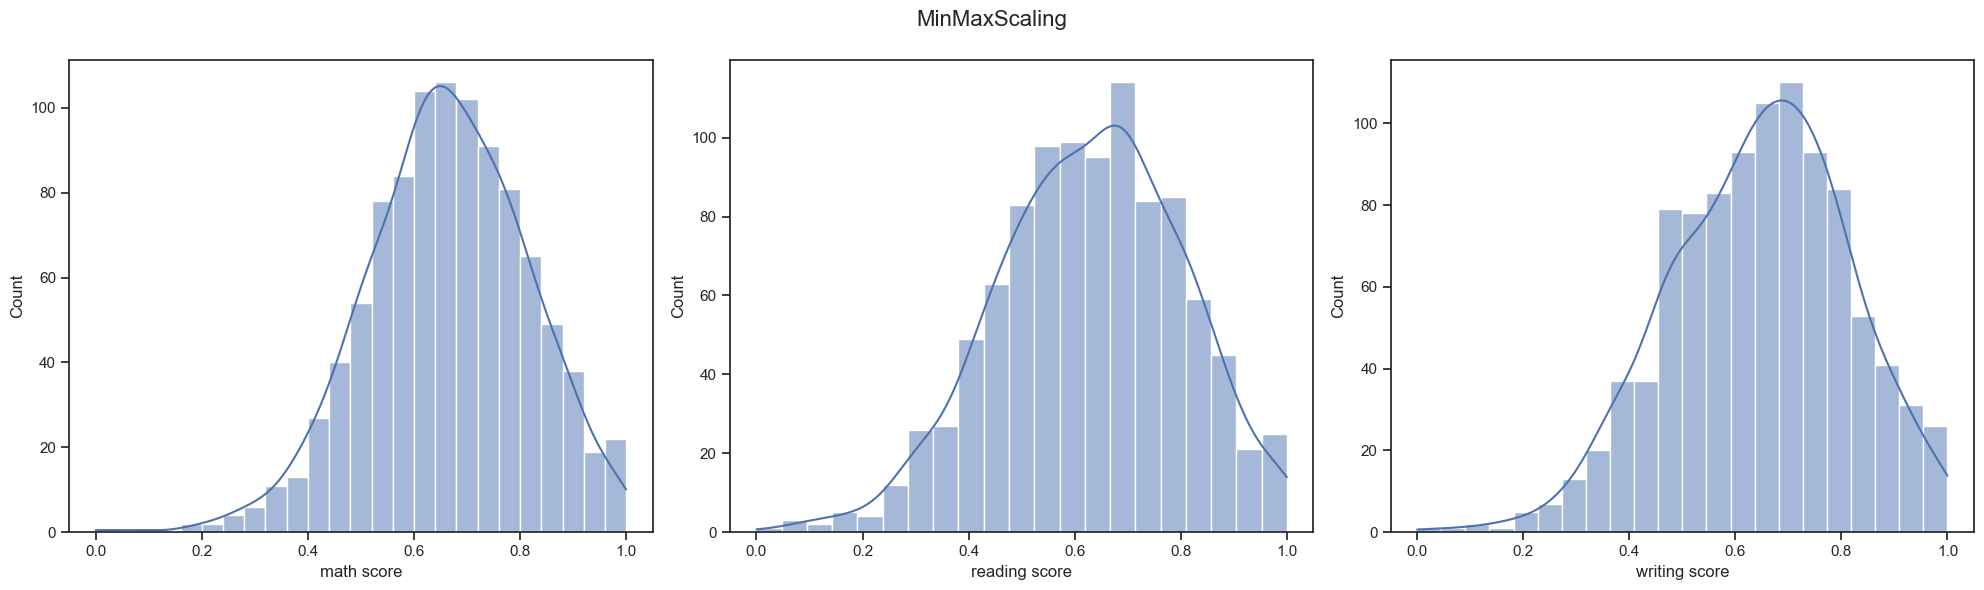

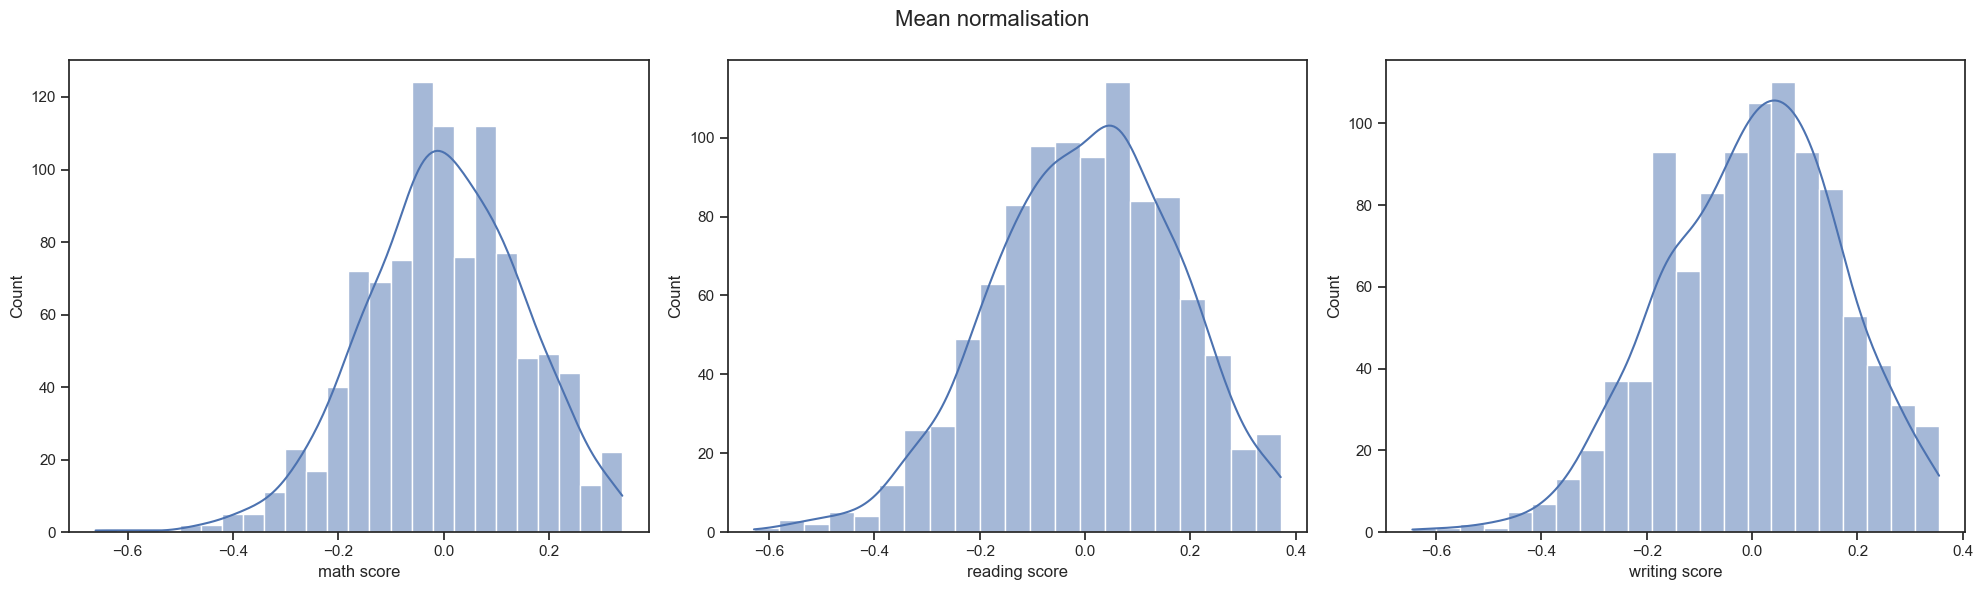

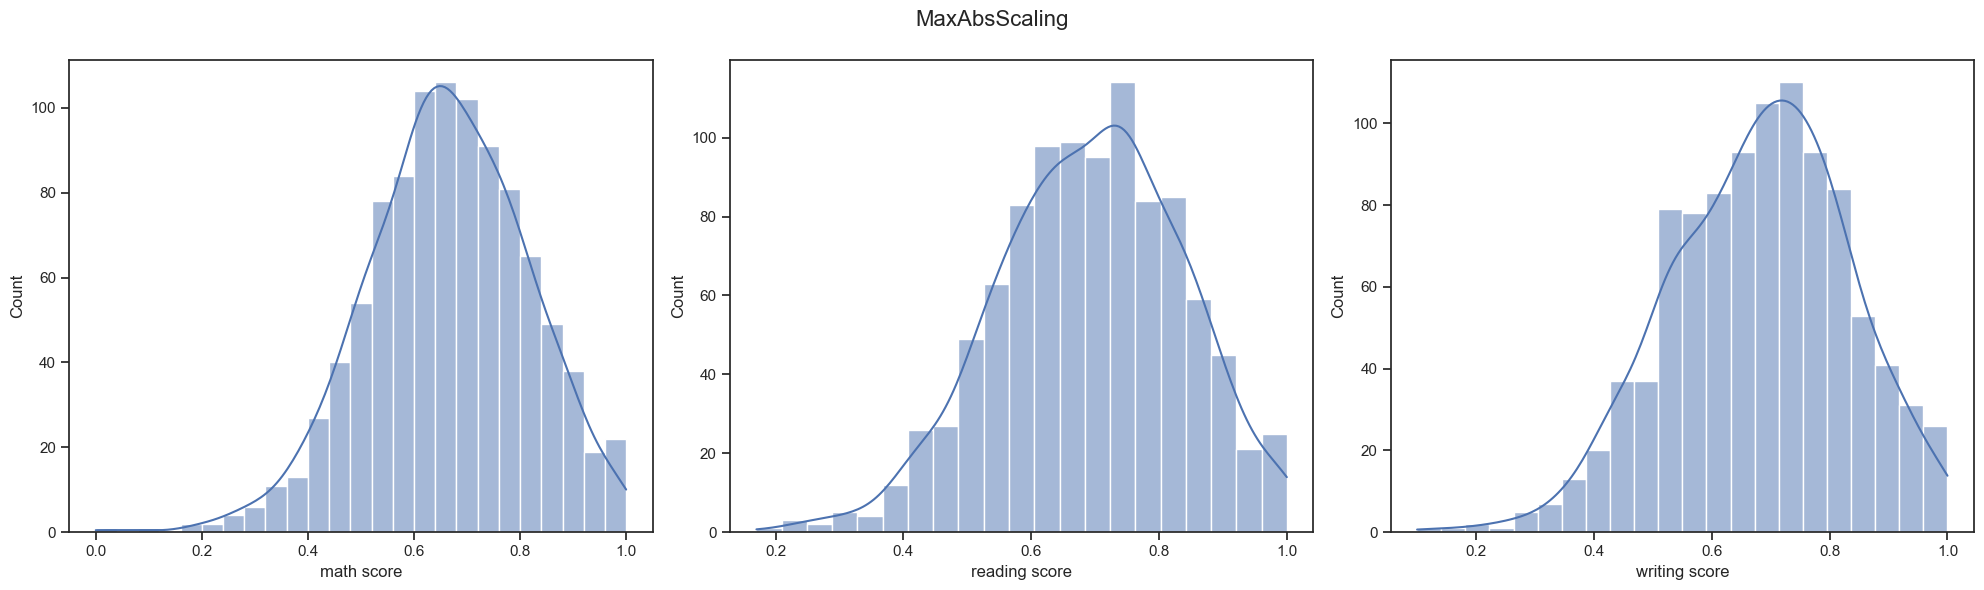

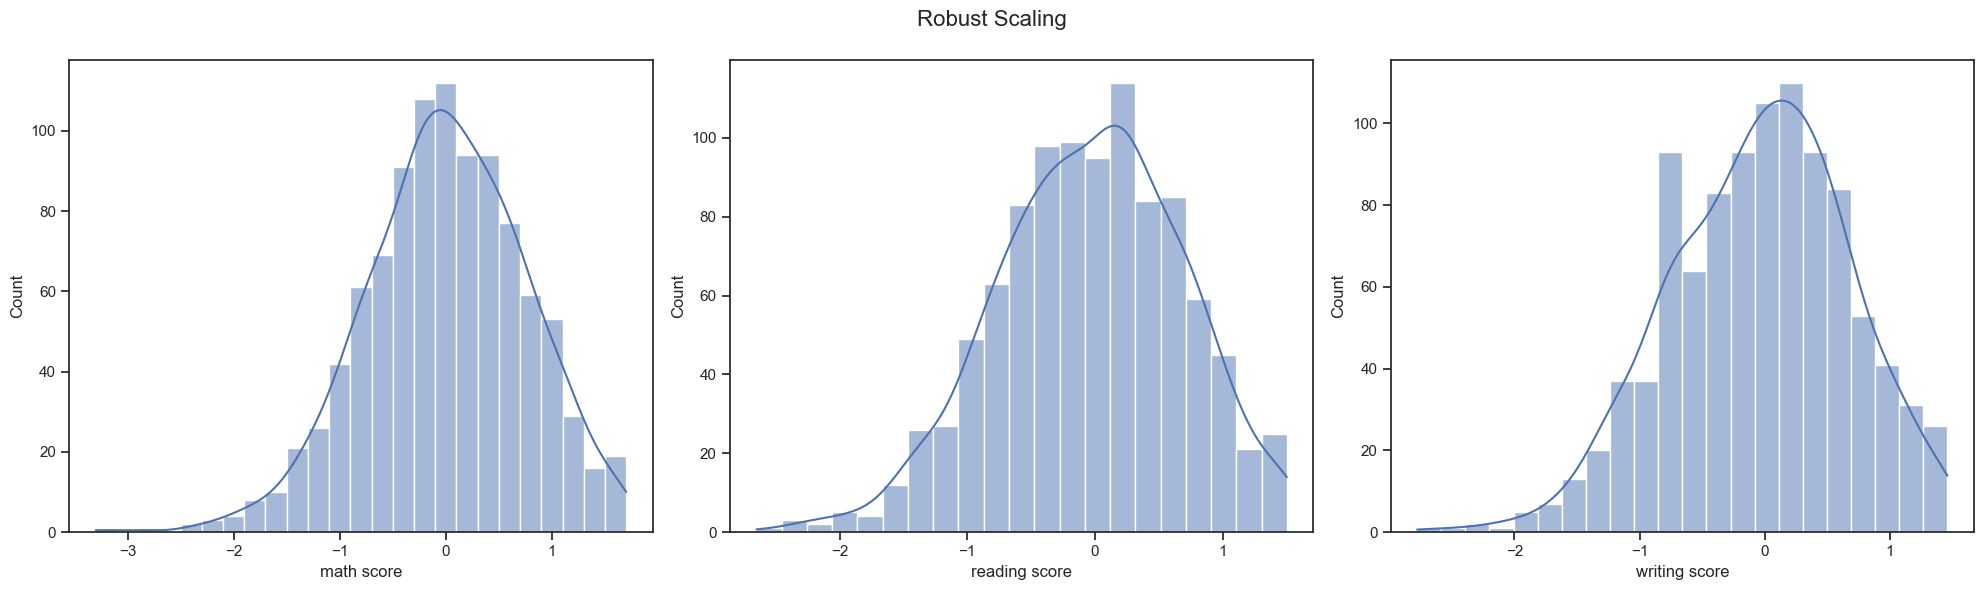

In [14]:
for i in mix:
    chiqar(i[0], i[1])